In [ ]:
import os
import cv2
import random
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import layers, regularizers, optimizers, callbacks
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
img_size = 96

def load_data(path, train=True):
    print("Loading data from: ", path)
    data = []
    for img in os.listdir(path):
        imgname, ext = os.path.splitext(img)
        ID, etc = imgname.split('__')
        ID = int(ID) - 1 # to_categorical encodes starting from 0
        if train:
            _, lr, finger, _, _ = etc.split('_')
        else:
            _, lr, finger, _  = etc.split('_')
        if lr=='Left':
            base = 0 # left hand corresponding to 0-4
        else: base  = 5 # right hand corresponding to 5-9
        if finger=="little":
            fingerNum = base + 0
        elif finger=='ring':
            fingerNum = base + 1
        elif finger=='middle':
            fingerNum = base + 2
        elif finger=='index':
            fingerNum = base + 3
        else: fingerNum = base + 4
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_resize = cv2.resize(img_array, (img_size, img_size))
        data.append([ID, fingerNum, img_resize])
    return data

In [ ]:
Altered_path = "../input/socofing/SOCOFing/Altered/Altered-"
Real_path = "../input/socofing/SOCOFing/Real"

Easy_data = load_data(Altered_path+'Easy', train=True)
Medium_data = load_data(Altered_path+'Medium', train=True)
Hard_data = load_data(Altered_path+'Hard', train=True)
Real_data = load_data(Real_path, train=False)

Loading data from:  ../input/socofing/SOCOFing/Altered/Altered-Easy


FileNotFoundError: [Errno 2] No such file or directory: '../input/socofing/SOCOFing/Altered/Altered-Easy'

In [ ]:
img_size = 96

def load_data(path, train=True):
    print("Loading data from: ", path)
#     data = []
    IDs = []
    fingerNums = []
    images = []
    for img in os.listdir(path):
        imgname, ext = os.path.splitext(img)
        ID, etc = imgname.split('__')
        ID = int(ID) - 1 # to_categorical encodes starting from 0
        if train:
            _, lr, finger, _, _ = etc.split('_')
        else:
            _, lr, finger, _  = etc.split('_')
        if lr=='Left':
            base = 0 # left hand corresponding to 0-4
        else: base  = 5 # right hand corresponding to 5-9
        if finger=="little":
            fingerNum = base + 0
        elif finger=='ring':
            fingerNum = base + 1
        elif finger=='middle':
            fingerNum = base + 2
        elif finger=='index':
            fingerNum = base + 3
        else: fingerNum = base + 4
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_resize = cv2.resize(img_array, (img_size, img_size))
        IDs.append(ID)
        fingerNums.append(fingerNum)
        images.append(img_resize)
    return IDs, fingerNums, images


# # Load data
Altered_path = "../input/socofing/SOCOFing/Altered/Altered-"
Real_path = "../input/socofing/SOCOFing/Real"

Easy_IDs, Easy_fingerNums, Easy_images = load_data(Altered_path+'Easy', train=True)
Medium_IDs, Medium_fingerNums, Medium_images = load_data(Altered_path+'Medium', train=True)
Hard_IDs, Hard_fingerNums, Hard_images = load_data(Altered_path+'Hard', train=True)
Real_IDS, Real_fingerNums, Real_images = load_data(Real_path, train=False)

Altered_IDs = np.concatenate([Easy_IDs, Medium_IDs, Hard_IDs], axis=0)
Altered_fingerNums = np.concatenate([Easy_fingerNums, Medium_fingerNums, Hard_fingerNums], axis=0)
Altered_images = np.concatenate([Easy_images, Medium_images, Hard_images], axis=0)

#Now not required these data so i dell it
del Easy_IDs, Easy_fingerNums, Easy_images
del Medium_IDs, Medium_fingerNums, Medium_images
del Hard_IDs, Hard_fingerNums, Hard_images

Loading data from:  ../input/socofing/SOCOFing/Altered/Altered-Easy


FileNotFoundError: [Errno 2] No such file or directory: '../input/socofing/SOCOFing/Altered/Altered-Easy'

In [ ]:
X_Altered, y_SubjectID_Altered, y_fingerNum_Altered = [], [], []

X_Altered = Altered_images.reshape(-1, img_size, img_size, 1) / 255.0

# Convert the labels to categorical
y_SubjectID_Altered = to_categorical(Altered_IDs, num_classes=600)
y_fingerNum_Altered = to_categorical(Altered_fingerNums, num_classes=10)

# Split the data into training and validation sets
X_SubjectID_train, X_SubjectID_val, y_SubjectID_train, y_SubjectID_val = train_test_split(
    X_Altered, y_SubjectID_Altered, test_size=0.2, random_state=2)
X_fingerNum_train, X_fingerNum_val, y_fingerNum_train, y_fingerNum_val = train_test_split(
    X_Altered, y_fingerNum_Altered, test_size=0.2, random_state=2)

In [ ]:
X_test, y_SubjectID_test, y_fingerNum_test = [], [], []

for SubjectID, fingerNum, feature in zip(Real_IDS, Real_fingerNums, Real_images):
    X_test.append(feature)
    y_SubjectID_test.append(SubjectID)
    y_fingerNum_test.append(fingerNum)

X_test = np.array(X_test).reshape(-1, img_size, img_size, 1)
X_test = X_test / 255.0

y_SubjectID_test = to_categorical(y_SubjectID_test, num_classes=600)
y_fingerNum_test = to_categorical(y_fingerNum_test, num_classes=10)

In [ ]:
print("Shapes:                  Feature shape    label shape")
print("----------------------------------------------------")
print("full SubjectID data:  ", X_Altered.shape, y_SubjectID_Altered.shape)
print("SubjectID_Train:      ", X_SubjectID_train.shape, y_SubjectID_train.shape)
print("SubjectID_Validation: ", X_SubjectID_val.shape, y_SubjectID_val.shape)
print("SubjectID_Test:       ", X_test.shape, y_SubjectID_test.shape)

Shapes:                  Feature shape    label shape
----------------------------------------------------
full SubjectID data:   (49270, 96, 96, 1) (49270, 600)
SubjectID_Train:       (39416, 96, 96, 1) (39416, 600)
SubjectID_Validation:  (9854, 96, 96, 1) (9854, 600)
SubjectID_Test:        (6000, 96, 96, 1) (6000, 600)


In [ ]:
#Two models use so:
model = [0] * 2
final_Dense_units = [600, 10]
model_name = ['SubjectID_Mod', 'FingerNum_Mod']
for i in range(2): #Loop for build two models
    model[i] = Sequential(name=model_name[i])

    model[i].add(layers.Conv2D(32, (5, 5), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape = (96, 96, 1)))
    model[i].add(layers.BatchNormalization())
    model[i].add(layers.MaxPool2D((2, 2)))
    model[i].add(layers.Conv2D(64,(5, 5), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model[i].add(layers.BatchNormalization())
    model[i].add(layers.MaxPool2D((2, 2)))
    model[i].add(layers.Conv2D(128,(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model[i].add(layers.BatchNormalization())
    model[i].add(layers.MaxPool2D((2, 2)))
    model[i].add(layers.Dropout(0.3))
    model[i].add(layers.Flatten())
    model[i].add(layers.Dense(256, activation='relu'))
    model[i].add(layers.Dropout(0.4))
    model[i].add(layers.Dense(final_Dense_units[i], activation='softmax'))

    # Complete with Adam optimizer and entropy cost
    model[i].compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


# **Models Summary**

In [ ]:
model[0].summary()
model[1].summary()

Model: "SubjectID_Mod"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 92, 92, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 92, 92, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 46, 46, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 42, 42, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 42, 42, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 19, 19, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 19, 19, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,654,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 600)            │       154,200 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,935,512 (11.20 MB)

 Trainable params: 2,935,064 (11.20 MB)

 Non-trainable params: 448 (1.75 KB)

Model: "FingerNum_Mod"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 92, 92, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 92, 92, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 46, 46, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 42, 42, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 42, 42, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 19, 19, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 19, 19, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,654,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,783,882 (10.62 MB)

 Trainable params: 2,783,434 (10.62 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
#For Removing warning massage that show when model training start
import logging
logging.basicConfig(level=logging.WARNING)
logging.getLogger('specific_logger').setLevel(logging.ERROR)
class FilterOutWarningMessages(logging.Filter):
    def filter(self, record):
        return 'WARNING' not in record.getMessage()

logging.basicConfig(level=logging.INFO)
logging.getLogger().addFilter(FilterOutWarningMessages())


In [ ]:
nets=2
history = [0] * nets
CallBack = [0] * nets
ReduceLR_minlr = [1e-9, 1e-7]
epochs = 20
batch_size = 64
for i in range(nets):
    CallBack[i] = [
        callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1),
        callbacks.ModelCheckpoint('./model'+str(i)+'.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True),
        callbacks.ReduceLROnPlateau(factor=0.1, patience=1, min_lr=ReduceLR_minlr[i], verbose=1),
        callbacks.TensorBoard(log_dir="./log_dir/"+model_name[i])]
history[0] = model[0].fit(X_SubjectID_train, y_SubjectID_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data = (X_SubjectID_val, y_SubjectID_val),
                    verbose = 1, callbacks= CallBack[0])

Epoch 1/20
  9/616 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.0000e+00 - loss: 7.5801

I0000 00:00:1712195215.211152      72 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


616/616 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0032 - loss: 6.6025
Epoch 1: val_accuracy improved from -inf to 0.00903, saving model to ./model0.keras
616/616 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.0032 - loss: 6.6023 - val_accuracy: 0.0090 - val_loss: 6.3113 - learning_rate: 1.0000e-04
Epoch 2/20
613/616 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0179 - loss: 6.1428
Epoch 2: val_accuracy improved from 0.00903 to 0.08809, saving model to ./model0.keras
616/616 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.0180 - loss: 6.1417 - val_accuracy: 0.0881 - val_loss: 5.3638 - learning_rate: 1.0000e-04
Epoch 3/20
613/616 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1022 - loss: 5.0594
Epoch 3: val_accuracy improved from 0.08809 to 0.38380, saving model to ./model0.keras
616/616 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.1024 - loss: 5.0573 - val_accuracy: 0.3838 - val_loss: 3.6512 - learning_rate: 1.0000e-04
Epoch 4/20
613/616 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 

### **Now Load FingerName dataset**


In [ ]:
# Now Delete the SubjectID dataset because it was used
del X_SubjectID_train, X_SubjectID_val, y_SubjectID_train, y_SubjectID_val
# Then reload fingerNum dataset before model fitting
X_fingerNum_train, X_fingerNum_val, y_fingerNum_train, y_fingerNum_val = train_test_split(
    X_Altered, y_fingerNum_Altered, test_size=0.2, random_state=2)

del X_Altered, y_fingerNum_Altered

history[1] = model[1].fit(X_fingerNum_train, y_fingerNum_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data = (X_fingerNum_val, y_fingerNum_val),
                    verbose = 1, callbacks= CallBack[1])

Epoch 1/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3462 - loss: 2.1428
Epoch 1: val_accuracy improved from -inf to 0.57692, saving model to ./model1.keras
616/616 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.3463 - loss: 2.1421 - val_accuracy: 0.5769 - val_loss: 1.3106 - learning_rate: 1.0000e-04
Epoch 2/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5938 - loss: 1.2654
Epoch 2: val_accuracy improved from 0.57692 to 0.68967, saving model to ./model1.keras
616/616 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5939 - loss: 1.2653 - val_accuracy: 0.6897 - val_loss: 1.0166 - learning_rate: 1.0000e-04
Epoch 3/20
613/616 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6989 - loss: 0.9532
Epoch 3: val_accuracy improved from 0.68967 to 0.82819, saving model to ./model1.keras
616/616 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6990 - loss: 0.9529 - val_accuracy: 0.8282 - val_loss: 0.6660 - learning_rate: 1.0000e-04
Epoch 4/20
613/616 ━━━━━━━━━━━━━━━━━━━━ 0s

# **Test Accuracy of both models**

In [ ]:
testing_acc_Id = model[0].evaluate([X_test], [y_SubjectID_test], verbose=0)
print("Id recognition accuracy: ",testing_acc_Id[1]*100, "%")
testing_acc_finger = model[1].evaluate([X_test], [y_fingerNum_test], verbose=0)
print("Finger recognition accuracy: ",testing_acc_finger[1]*100, "%")

Id recognition accuracy:  99.75000023841858 %
Finger recognition accuracy:  99.88333582878113 %


 # **Training And Validation Accuracy & Loss of SubjectID Model**

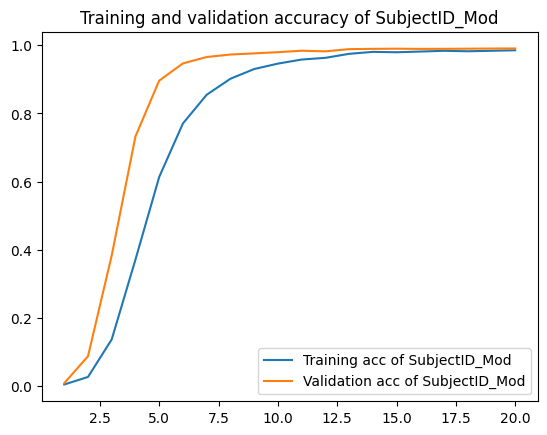

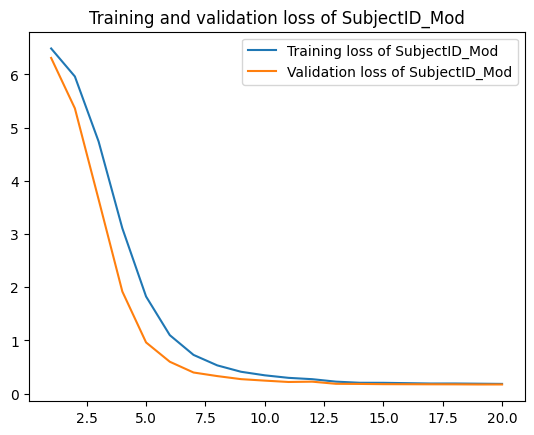

In [ ]:
acc0 = history[0].history['accuracy']
val_acc0 = history[0].history['val_accuracy']
loss0 = history[0].history['loss']
val_loss0 = history[0].history['val_loss']

epochs = range(1, len(acc0) + 1)
# plot figures models
plt.figure()
plt.plot(epochs, acc0, label='Training acc of '+model_name[0])
plt.plot(epochs, val_acc0, label='Validation acc of '+model_name[0])
plt.title('Training and validation accuracy of '+model_name[0])
plt.legend()
plt.figure()
plt.plot(epochs, loss0,  label='Training loss of '+model_name[0])
plt.plot(epochs, val_loss0, label='Validation loss of '+model_name[0])
plt.title('Training and validation loss of '+model_name[0])
plt.legend()


# **Training And Validation Accuracy & Loss of FingerNum Model**

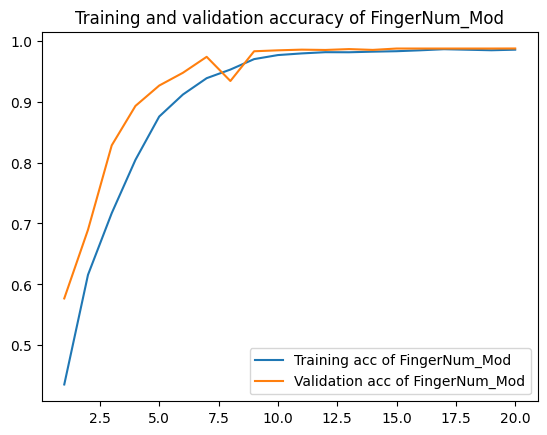

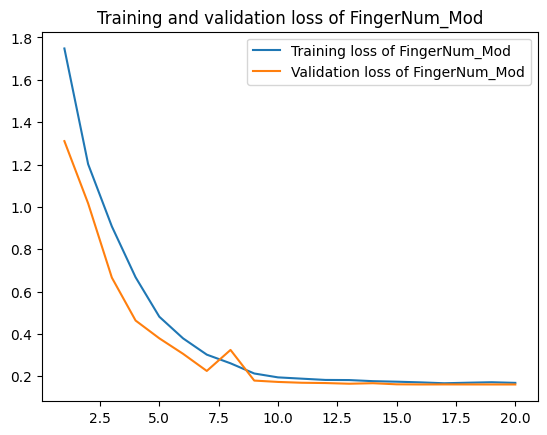

In [ ]:
acc1 = history[1].history['accuracy']
val_acc1 = history[1].history['val_accuracy']
loss1 = history[1].history['loss']
val_loss1 = history[1].history['val_loss']

epochs = range(1, len(acc1) + 1)
# plot figures models
plt.figure()
plt.plot(epochs, acc1, label='Training acc of '+model_name[1])
plt.plot(epochs, val_acc1, label='Validation acc of '+model_name[1])
plt.title('Training and validation accuracy of '+model_name[1])
plt.legend()
plt.figure()
plt.plot(epochs, loss1,  label='Training loss of '+model_name[1])
plt.plot(epochs, val_loss1, label='Validation loss of '+model_name[1])
plt.title('Training and validation loss of '+model_name[1])
plt.legend()

# **Confusion matrix Visualize Function**

In [ ]:
  def plot_confusion_matrix(conmat, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(conmat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        conmat = conmat.astype('float') / conmat.sum(axis=1)[:, np.newaxis]

    thresh = conmat.max() / 2.
    for i, j in itertools.product(range(conmat.shape[0]), range(conmat.shape[1])):
        plt.text(j, i, conmat[i, j],
                 horizontalalignment="center",
                 color="white" if conmat[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Real label')
    plt.xlabel('Predicted label')

# **Predictions on FingerNum**

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


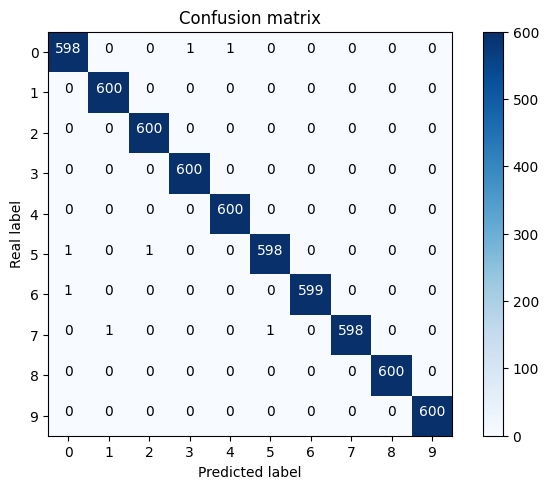

In [ ]:
# Predict the values from the test dataset
y_fingerNum_pred = model[1].predict(X_test)
# Convert predictions classes to one hot vectors
y_fingerNum_pred_classes = np.argmax(y_fingerNum_pred, axis=1)
# Convert test observations to one hot vectors
y_fingerNum_real = np.argmax(y_fingerNum_test, axis=1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_fingerNum_real, y_fingerNum_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

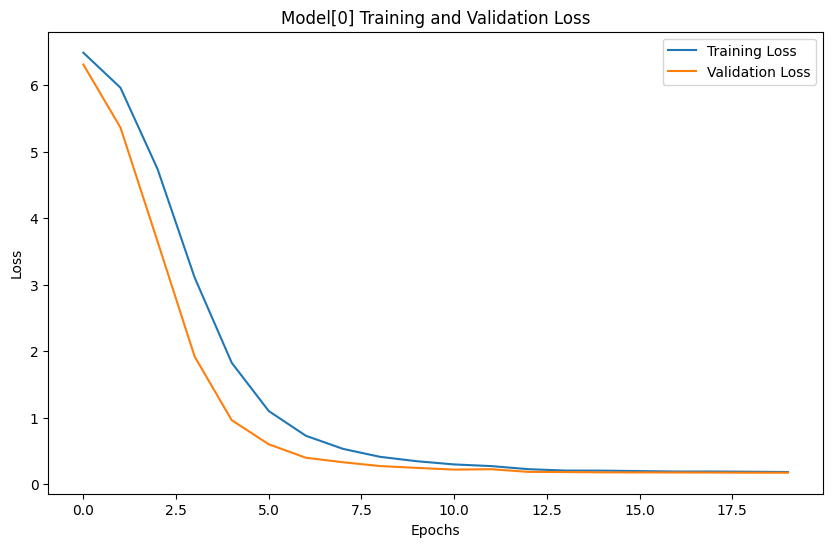

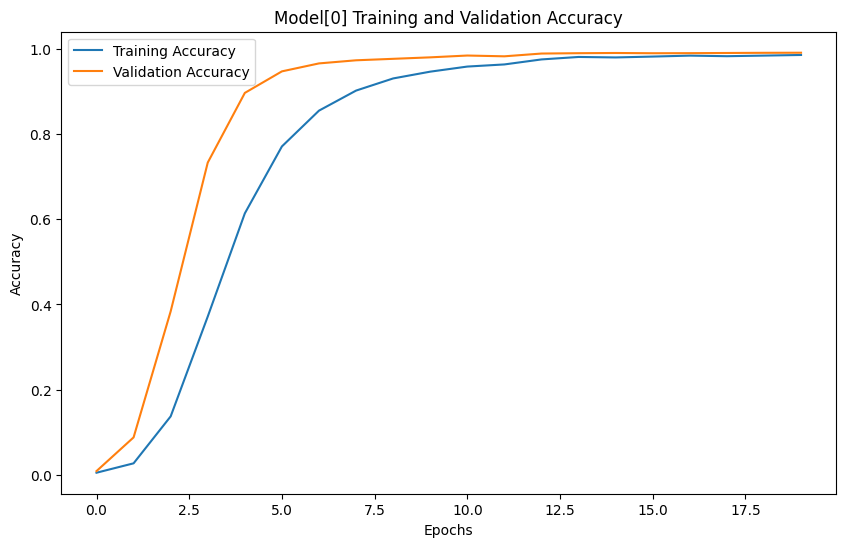

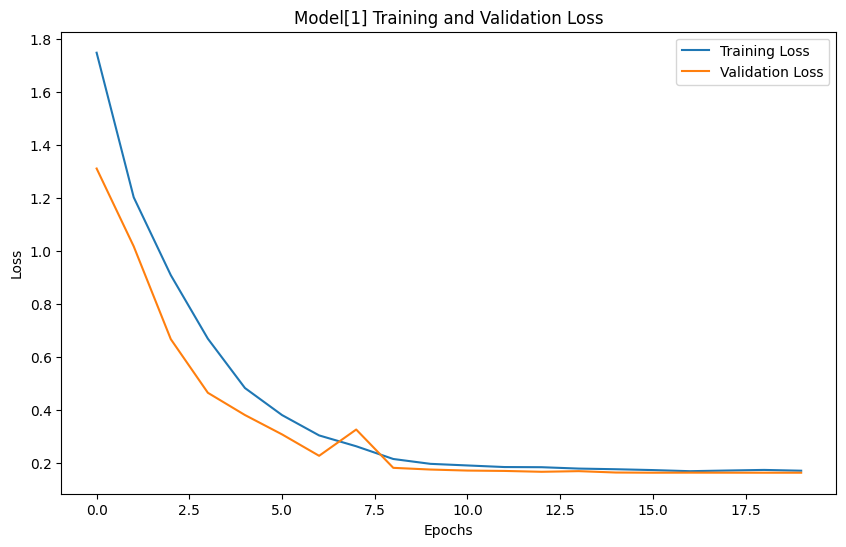

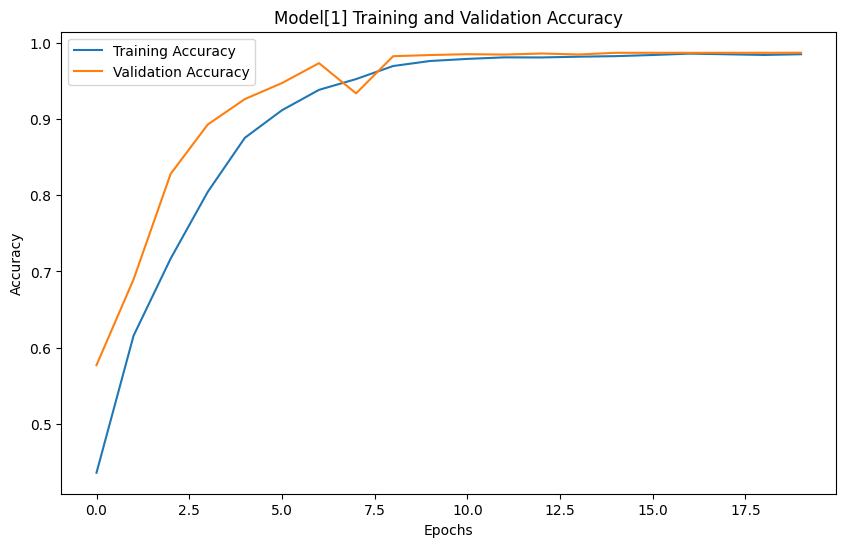

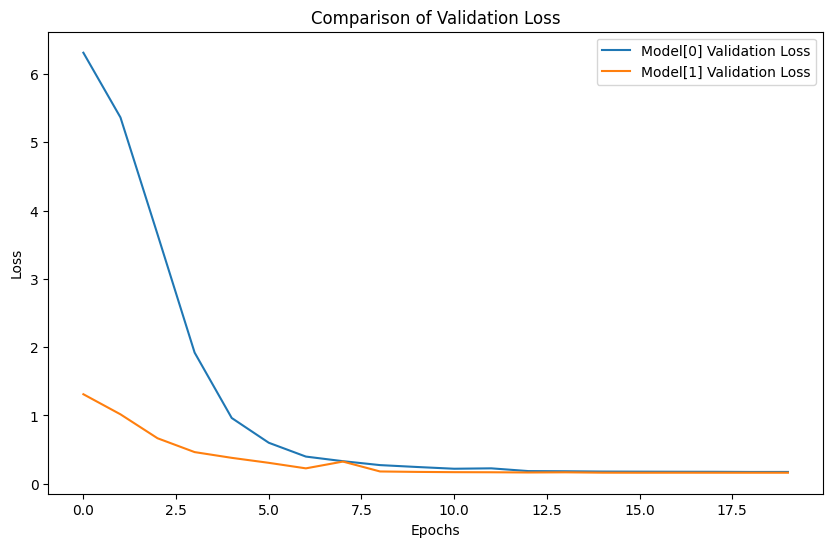

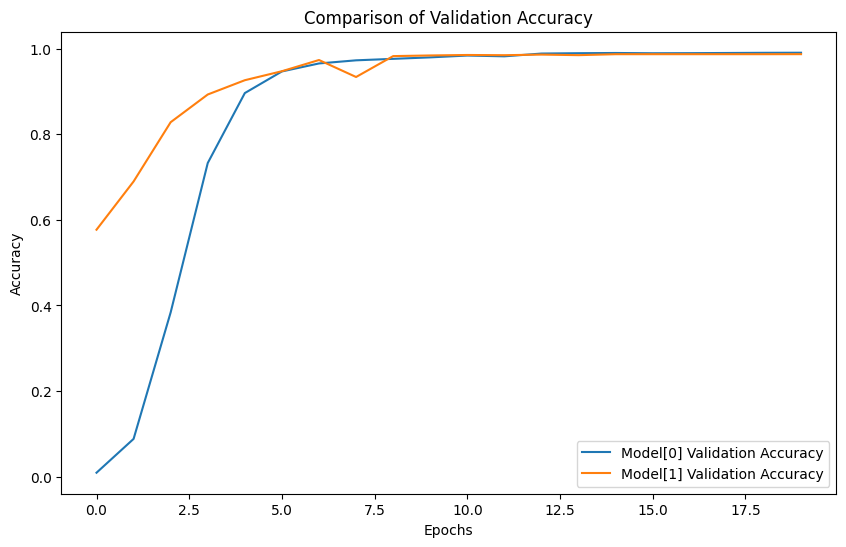

In [ ]:
import matplotlib.pyplot as plt

# Function to plot training and validation metrics for a given model
def plot_metrics(history, metric, model_name):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history[metric], label=f'Training {metric.capitalize()}')
    plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric.capitalize()}')
    plt.title(f'{model_name} Training and Validation {metric.capitalize()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot training and validation metrics for both models
for i in range(2):  # Assuming you have 2 models
    plot_metrics(history[i], 'loss', f'Model[{i}]')
    plot_metrics(history[i], 'accuracy', f'Model[{i}]')

# Function to compare a specific metric of two models
def compare_metrics(history1, history2, metric):
    plt.figure(figsize=(10, 6))
    plt.plot(history1.history[f'val_{metric}'], label=f'Model[0] Validation {metric.capitalize()}')
    plt.plot(history2.history[f'val_{metric}'], label=f'Model[1] Validation {metric.capitalize()}')
    plt.title(f'Comparison of Validation {metric.capitalize()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Compare validation metrics of both models
compare_metrics(history[0], history[1], 'loss')
compare_metrics(history[0], history[1], 'accuracy')


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Infomation confirm! Fingerprint matches: person Id 370 left middle


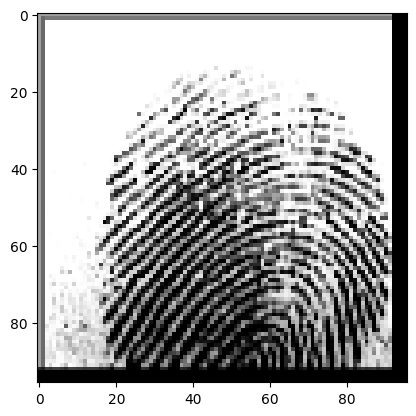

In [ ]:
def show_fingername(fingernum):
    if fingernum>=5:
        fingername = "right "
        fingernum -= 5
    else: fingername = "left "
    if fingernum==0:
        fingername += "little"
    elif fingernum==1:
        fingername += "ring"
    elif fingernum==2:
        fingername += "middle"
    elif fingernum==3:
        fingername += "index"
    else: fingername += "thumb"
    return fingername

# Randomly pick a fingerprint from test data to predict both its Id and fingername
rand_fp_num = random.randint(0, X_test.shape[0]-1)
plt.imshow(X_test[rand_fp_num].reshape((96, 96)), cmap ='gray')
y_SubjectID_pred = model[0].predict(X_test)
Id_pred = np.argmax(y_SubjectID_pred[rand_fp_num])
Id_real = np.argmax(y_SubjectID_test[rand_fp_num])
fingerNum_pred = np.argmax(y_fingerNum_pred[rand_fp_num])
fingerNum_real = np.argmax(y_fingerNum_test[rand_fp_num])
if Id_pred==Id_real and fingerNum_pred==fingerNum_real:
    print("Infomation confirm! Fingerprint matches: person Id",Id_pred, show_fingername(fingerNum_pred))
else:
    print("Oops! Prediction is wrong!")